In [1]:
"""
Constant-pressure, adiabatic kinetics simulation.

Requires: cantera >= 2.5.0, ma|tplotlib >= 2.0
"""

import sys
import os
import numpy   as np

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import cantera as ct

from scipy.integrate import solve_ivp

In [2]:
##########################################################################################
### Input Data

OutputDir          = WORKSPACE_PATH + '/ROMNet/Data_100DReact/'
FigDir             = OutputDir + '/fig/'

MixtureFile        = 'gri30.yaml'
NTs                = 10
T0Vec              = np.logspace(np.log10(300), np.log10(3000), NTs) # [2.e-5]
NPerT0             = 2000
tMinVec            = [5.e-3, 5.e-7]

tStratch           = 1.
Nt                 = NPerT0*2

P0Inlet            = ct.one_atm
EqRatioInlet       = 1.
##########################################################################################

In [3]:
def IdealGasConstPressureReactor_SciPY(t, y):
    print(t)

    YEnd     = np.array([1.-np.sum(y[1:])], dtype=np.float64)
    Y        = np.concatenate((y[1:], YEnd), axis=0)
    gas_.TPY = y[0], P_, Y
    
    wdot     = gas_.net_production_rates

    ydot     = np.zeros_like(y, dtype=np.float64)
    ydot[0]  = - np.dot(wdot, gas_.partial_molar_enthalpies) / gas_.cp / gas_.density
    ydot[1:] = wdot[0:-1] * gas_.molecular_weights[0:-1] / gas_.density
    
    return ydot


def IdealGasReactor_SciPY(t, y):
    print(t)

    YEnd     = np.array([1.-np.sum(y[1:])], dtype=np.float64)
    Y        = np.concatenate((y[1:], YEnd), axis=0)
    gas_.TDY = y[0], density_, Y
    
    wdot     = gas_.net_production_rates

    ydot     = np.zeros_like(y, dtype=np.float64)
    ydot[0]  = - np.dot(wdot, gas_.partial_molar_int_energies) / gas_.cv / density_
    ydot[1:] = wdot[0:-1] * gas_.molecular_weights[0:-1] / density_
    
    return ydot

In [4]:
gas = ct.Solution('gri30.yaml')
gas.TPX = 1700.0, ct.one_atm, 'H2:2,O2:1,N2:4'

In [5]:
#T0      = 1400
#gas.TPX = T0, 10.*ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'
r       = ct.IdealGasConstPressureReactor(gas)
sim     = ct.ReactorNet([r])

gas_    = gas
mass_   = r.mass
density_= r.density
P_      = gas_.P
print(gas_.P)

y0      = np.array(np.hstack((gas_.T, gas_.Y[0:-1])), dtype=np.float64)

101325.00000000003


In [6]:
tMin     = 1.e-6 #(tMinVec[1]-tMinVec[0])*(T0-900.)/(1700.-900.) + tMinVec[0]
tMax     = 1.e-2
dt0      = 1.e-6
tStratch = 1.3
tVec     = [0.0]
t        = tMin
dt       = dt0
while (t <= tMax):
    tVec.append(t)
    t  =   t + dt
    dt = dt0 * tStratch
rtol     = 1.e-10
SOLVER   = 'BDF'#'RK23'#'BDF'#'Radau'

In [7]:
states   = ct.SolutionArray(gas, 1, extra={'t': [0.0]})
output   = solve_ivp( IdealGasConstPressureReactor_SciPY, (tVec[0],tVec[-1]), y0, method=SOLVER, t_eval=tVec, rtol=rtol )

0.0
0.0011546956646404378
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.070875328129549e-09
2.070875328129549e-09
4.141750656259098e-09
4.141750656259098e-09
2.4850503937554583e-08
2.4850503937554583e-08
4.555925721885007e-08
4.555925721885007e-08
1.729228755228126e-07
1.729228755228126e-07
3.0028649382677513e-07
3.0028649382677513e-07
4.2765011213073766e-07
4.2765011213073766e-07
6.31682477189151e-07
6.31682477189151e-07
8.357148422475644e-07
8.357148422475644e-07
1.0397472073059777e-06
1.0397472073059777e-06
1.0397472073059777e-06
1.243779572364391e-06
1.243779572364391e-06
1.243779572364391e-06
1.431691070381905e-06
1.431691070381905e-06
1.431691070381905e-06
1.6196025683994187e-06
1.6196025683994187e-06
1.6196025683994187e-06
1.8075140664169325e-06
1.8075140664169325e-06
1.8075140664169325e-06
1.9954255644344

5.306204127168494e-06
5.306204127168494e-06
5.306204127168494e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.285451865586964e-06
5.285451865586964e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.29236928611414e-06
5.292369

5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.60562838193642e-06
5.601447290891015e-06
5.601447290891015e-06
5.599356745368312e-06
5.599356745368312e-06
5.598311472606961e-06
5.598311

6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613421e-06
6.19203240613

6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.474230725354079e-06
6.464847313943673e-06
6.464847313943673e-06
6.474230725354079e-06
6.474230725354079e-06
6.483614136764486e-06
6.483614136764486e-06
6.492997548174892e-06
6.49299754

6.7382896097299605e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.778222404706189e-06
6.7782224

7.072679995664448e-06
7.072679995664448e-06
7.078227674431295e-06
7.078227674431295e-06
7.083775353198143e-06
7.083775353198143e-06
7.08932303196499e-06
7.08932303196499e-06
7.094870710731838e-06
7.094870710731838e-06
7.100418389498685e-06
7.100418389498685e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.137313677756334e-06
7.1373136777

7.339504482449747e-06
7.339504482449747e-06
7.339504482449747e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.390627377450755e-06
7.39062737

7.477296660382179e-06
7.477296660382179e-06
7.46731171995229e-06
7.46731171995229e-06
7.46731171995229e-06
7.46731171995229e-06
7.477296660382179e-06
7.477296660382179e-06
7.487281600812069e-06
7.487281600812069e-06
7.497266541241958e-06
7.497266541241958e-06
7.507251481671848e-06
7.507251481671848e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792137e-06
7.544682634792

7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.6106031404967005e-06
7.610603140

7.744517896225665e-06
7.744517896225665e-06
7.744680601095284e-06
7.744680601095284e-06
7.744843305964902e-06
7.744843305964902e-06
7.745006010834521e-06
7.745006010834521e-06
7.74516871570414e-06
7.74516871570414e-06
7.74679576440033e-06
7.74679576440033e-06
7.748422813096518e-06
7.748422813096518e-06
7.750049861792707e-06
7.750049861792707e-06
7.751676910488897e-06
7.751676910488897e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450787e-06
7.767947397450

7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.974699744002591e-06
7.949459326775265e-06
7.949459326775265e-06
7.949459326775265e-06
7.936839118161603e-06
7.936839118161603e-06
7.930529013854771e-06
7.930529013854771e-06
7.936839118161603e-06
7.936839118161603e-06
7.943149222468434e-06
7.943149222468434e-06
7.949459326775265e-06
7.949459326775265e-06
7.955769431082097e-06
7.955769431082097e-06
7.962079535388928e-06
7.962079535388928e-06
8.003682756077543e-06
8.003682756077543e-06
8.00368275

8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.237561822704916e-06
8.219314640108524e-06
8.219314640108524e-06
8.210191048810328e-06
8.210191048810328e-06
8.219314640108525e-06
8.219314640108525e-06
8.228438231406723e-06
8.228438231406723e-06
8.23756182270492e-06
8.23756182270492e-06
8.246685414003117e-06
8.246685414003117e-06
8.29042997315259e-06
8.29042997315259e-06
8.29042997315259e-06
8.29042997315259e-06
8.29042997315259

8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.490028024919628e-06
8.49002802

8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.618499368397613e-06
8.593084285349178e-06
8.593084285349178e-06
8.58037674382496e-06
8.58037674382496e-06
8.57402297306285e-06
8.57402297306285e-06
8.580376743824958e-06
8.580376743824958e-06
8.586730514587066e-06
8.586730514587066e-06
8.593084285349175e-06
8.593084285349175e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792038e-06
8.652707319792

8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.922899761861468e-06
8.886718910388816e-06
8.886718910388816e-06
8.868628484652491e-06
8.868628484652491e-06
8.868628484652491e-06
8.868628484652491e-06
8.886718910388818e-06
8.886718910388818e-06
8.886718910388818e-06
8.886718910388818e-06
8.904809336125145e-06
8.904809336125145e-06
8.904809336125145e-06
8.904809336125145e-06
8.922899761861471e-06
8.922899761861471e-06
8.92289976

9.259254142798966e-06
9.259254142798966e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.270675376454795e-06
9.27067537

9.41769256379044e-06
9.41769256379044e-06
9.40133475259575e-06
9.40133475259575e-06
9.40133475259575e-06
9.417692563790442e-06
9.417692563790442e-06
9.417692563790442e-06
9.434050374985133e-06
9.434050374985133e-06
9.434050374985133e-06
9.450408186179824e-06
9.450408186179824e-06
9.450408186179824e-06
9.450408186179824e-06
9.466765997374516e-06
9.466765997374516e-06
9.466765997374516e-06
9.466765997374516e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.535217425903075e-06
9.5352174259030

9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.667268788740025e-06
9.667268788740025e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.715112059455606e-06
9.71511205

9.809691688110805e-06
9.809691688110805e-06
9.809691688110805e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.821088138642645e-06
9.82108813

1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.0089091040297742e-05
1.008909104

1.0363994418283241e-05
1.0363994418283241e-05
1.0320060440582848e-05
1.0320060440582848e-05
1.0298093451732652e-05
1.0298093451732652e-05
1.0298093451732652e-05
1.0287109957307553e-05
1.0287109957307553e-05
1.0298093451732652e-05
1.0298093451732652e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05
1.030907694615775e-05

1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0561587862617767e-05
1.0516078250122242e-05
1.0516078250122242e-05
1.049332344387448e-05
1.049332344387448e-05
1.0481946040750599e-05
1.0481946040750599e-05
1.04933234438

1.071790511479361e-05
1.071790511479361e-05
1.0719776838205744e-05
1.0719776838205744e-05
1.0721648561617878e-05
1.0721648561617878e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.0740365795739218e-05
1.07403657957

1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.089363142865662e-05
1.089363142865662e-05
1.0905055521748264e-05
1.0905055521748264e-05
1.0916479614839907e-05
1.0916479614839907e-05
1.0916479614839907e-05
1.092790370793155e-05
1.092790370793155e-05
1.092790370793155e-05
1.092790370793155e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.1029714060363233e-05
1.102971406036323

1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.1265148400869546e-05
1.126514840

1.1371292843321282e-05
1.1371292843321282e-05
1.1373882540652443e-05
1.1373882540652443e-05
1.1376472237983605e-05
1.1376472237983605e-05
1.1379061935314767e-05
1.1379061935314767e-05
1.138165163264593e-05
1.138165163264593e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.1407548605957548e-05
1.14075486059

1.1652636073605702e-05
1.1652636073605702e-05
1.1663889462194165e-05
1.1663889462194165e-05
1.1675142850782628e-05
1.1675142850782628e-05
1.168639623937109e-05
1.168639623937109e-05
1.1697649627959553e-05
1.1697649627959553e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.181018351384418e-05
1.

1.2254250852300839e-05
1.2254250852300839e-05
1.2273248709118895e-05
1.2273248709118895e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.2463227277299454e-05
1.246322727

1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.2562553230365598e-05
1.256255323

1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.2890704527342353e-05
1.289070452

1.3438843894574303e-05
1.3438843894574303e-05
1.332865662469884e-05
1.332865662469884e-05
1.3273562989761108e-05
1.3273562989761108e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.323224276355781e-05
1.323224276355781e-05
1.323224276355781e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.3246016172292243e-05
1.32460161722922

1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3443162030098453e-05
1.3443162030098453e-05
1.3454572782638187e-05
1.3454572782638187e-05
1.3465983535177921e-05
1.3465983535177921e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.3525552332992131e-05
1.352555233

1.4003073661330698e-05
1.4024394816792656e-05
1.4024394816792656e-05
1.4045715972254613e-05
1.4045715972254613e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420260416296682e-05
1.420

1.4486383806738119e-05
1.4486383806738119e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.4673080940798177e-05
1.467308094

1.4684749511676927e-05
1.4670163798078484e-05
1.4670163798078484e-05
1.4684749511676926e-05
1.4684749511676926e-05
1.4699335225275367e-05
1.4699335225275367e-05
1.4713920938873809e-05
1.4713920938873809e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.4859778074858223e-05
1.485977807

1.5167409480350502e-05
1.518775547277724e-05
1.518775547277724e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.520810146520398e-05
1.5208101

1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.557674288783014e-05
1.55767428

1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.5870261186759756e-05
1.58742450027959e-05
1.58742450027959e-05
1.5878228818832046e-05
1.5878228818832046e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193492e-05
1.5918066979193

1.606010878681359e-05
1.606010878681359e-05
1.606010878681359e-05
1.606010878681359e-05
1.606010878681359e-05
1.606010878681359e-05
1.606010878681359e-05
1.606010878681359e-05
1.606010878681359e-05
1.606010878681359e-05
1.606010878681359e-05
1.606010878681359e-05
1.606010878681359e-05
1.605795625624848e-05
1.605795625624848e-05
1.6060108786813595e-05
1.6060108786813595e-05
1.606226131737871e-05
1.606226131737871e-05
1.6064413847943823e-05
1.6064413847943823e-05
1.6085939153594966e-05
1.6085939153594966e-05
1.6107464459246108e-05
1.6107464459246108e-05
1.612898976489725e-05
1.612898976489725e-05
1.6150515070548393e-05
1.6150515070548393e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.6339578204077266e-05
1.63395

1.6455961766931813e-05
1.6455961766931813e-05
1.6455961766931813e-05
1.6455961766931813e-05
1.6455961766931813e-05
1.6455961766931813e-05
1.6455961766931813e-05
1.6455961766931813e-05
1.6455961766931813e-05
1.6455961766931813e-05
1.6455961766931813e-05
1.6455961766931813e-05
1.643891496003215e-05
1.643891496003215e-05
1.6455961766931816e-05
1.6455961766931816e-05
1.647300857383148e-05
1.647300857383148e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731146e-05
1.6490055380731

1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.666851414046202e-05
1.6667848249567502e-05
1.6667848249567502e-05
1.6667515304120244e-05
1.6667515304120244e-05
1.6667348831396614e-05
1.6667348831396614e-05
1.6667515304120244e-05
1.6667515304120244e-05
1.6667681776843875e-05
1.6667681776843875e-05


1.7296397122518136e-05
1.7296397122518136e-05
1.7296397122518136e-05
1.726253454206128e-05
1.726253454206128e-05
1.7296397122518133e-05
1.7296397122518133e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.7330259702974985e-05
1.73302597029

1.7881027376246744e-05
1.7881027376246744e-05
1.7818342873105424e-05
1.7818342873105424e-05
1.7818342873105424e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.7881027376246744e-05
1.788102737

1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8217466857950595e-05
1.8186859190401116e-05
1.8186859190401116e-05
1.8171555356626374e-05
1.8171555356626374e-05
1.8163903439739003e-05
1.8163903439739003e-05
1.817155535662637e-05
1.817155535662637e-05
1.8179207273513738e-05
1.8179207273513738e-05
1.8186859190401106e-05
1.8186859190401106e-05
1.82633783592

1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8681230044399772e-05
1.8776886100186967e-05
1.8776886100186967e-05
1.8776886100186967e-05
1.877688610

1.966847297716963e-05
1.966847297716963e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.945713833616507e-05
1.945713833616507e-05
1.945713833616507e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.9527583216499923e-05
1.95275832164999

2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.0144112779832706e-05
2.014411277

2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0814981074382013e-05
2.0685398698471457e-05
2.0685398698471457e-05
2.0814981074382016e-05
2.0814981074382016e-05
2.0814981074382016e-05
2.0814981074382016e-05
2.0814981074382016e-05
2.0814981074382016e-05
2.081498107

2.1180306573719055e-05
2.1180306573719055e-05
2.1180306573719055e-05
2.1198440660136476e-05
2.1198440660136476e-05
2.1216574746553896e-05
2.1216574746553896e-05
2.1216574746553896e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-05
2.13979156107281e-

2.2321391514196807e-05
2.2321391514196807e-05
2.2323398090630416e-05
2.2323398090630416e-05
2.2325404667064025e-05
2.2325404667064025e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.2345470431400117e-05
2.234547043

2.3149857871763357e-05
2.3149857871763357e-05
2.3149857871763357e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.3411691538669214e-05
2.341169153

2.3920869778997206e-05
2.3920869778997206e-05
2.3920869778997206e-05
2.3920869778997206e-05
2.3920869778997206e-05
2.3920869778997206e-05
2.3920869778997206e-05
2.3920869778997206e-05
2.3920869778997206e-05
2.3920869778997206e-05
2.3912484287934578e-05
2.3912484287934578e-05
2.3908291542403265e-05
2.3908291542403265e-05
2.3906195169637607e-05
2.3906195169637607e-05
2.3908291542403265e-05
2.3908291542403265e-05
2.3910387915168923e-05
2.3910387915168923e-05
2.391248428793458e-05
2.391248428793458e-05
2.393344801559116e-05
2.393344801559116e-05
2.393344801559116e-05
2.395441174324774e-05
2.395441174324774e-05
2.395441174324774e-05
2.397537547090432e-05
2.397537547090432e-05
2.39963391985609e-05
2.39963391985609e-05
2.42059764751267e-05
2.42059764751267e-05
2.42059764751267e-05
2.42059764751267e-05
2.42059764751267e-05
2.42059764751267e-05
2.42059764751267e-05
2.42059764751267e-05
2.42059764751267e-05
2.42059764751267e-05
2.42059764751267e-05
2.42059764751267e-05
2.42059764751267e-05
2.420

2.460099592730341e-05
2.460099592730341e-05
2.460099592730341e-05
2.4562718848604123e-05
2.4562718848604123e-05
2.460099592730341e-05
2.460099592730341e-05
2.4639273006002698e-05
2.4639273006002698e-05
2.4677550084701986e-05
2.4677550084701986e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.4970248204932386e-05
2.49702482049323

2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.5704314516549777e-05
2.570431451

2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5831564462954978e-05
2.5759263357042986e-05
2.5759263357042986e-05
2.572311280

2.6592175922079003e-05
2.6592175922079003e-05
2.6673129760803495e-05
2.6673129760803495e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.6754083599527988e-05
2.675408359

2.7781242375399828e-05
2.7727154711401006e-05
2.7727154711401006e-05
2.7700110879401593e-05
2.7700110879401593e-05
2.7686588963401885e-05
2.7686588963401885e-05
2.770011087940159e-05
2.770011087940159e-05
2.7713632795401294e-05
2.7713632795401294e-05
2.7727154711401e-05
2.7727154711401e-05
2.7740676627400704e-05
2.7740676627400704e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.787589578739775e-05
2.7

2.8609748787251286e-05
2.8636996852253123e-05
2.8636996852253123e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.866424491725496e-05
2.86642

2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.9936606375973294e-05
2.993660637

2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.937793900857968e-05
2.9373843206765937e-05
2.9373843206765937e-05
2.937793900857968e-05
2.937793900857968e-05
2.9382034810393423e-05
2.9382034810393423e-05
2.9386130612207166e-05
2.9386130612207166e-05
2.9427088630344595e-05
2.9427088630344595e-05
2.9468046648482023e-05
2.9468046648482023e-05
2.9509004666619452e-05
2.9509004666619452e-05
2.954996268475688e-05
2.954996268475688e-05
2.9904853075184844e-05
2.9904853075184844e-05
2.9904853075184844e-05
2.9904853075184844e-05
2.9904853075184844e-05
2.9904853075184844e-05
2.9904853075184844e-05
2.9904853075184844e-05
2.9904853075

2.991802283576715e-05
2.991802283576715e-05
2.9935351468112268e-05
2.9935351468112268e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.0108637791563456e-05
3.01086377915

3.0473825180242446e-05
3.0473825180242446e-05
3.0431518948931157e-05
3.0431518948931157e-05
3.0410365833275513e-05
3.0410365833275513e-05
3.039978927544769e-05
3.039978927544769e-05
3.039978927544769e-05
3.0410365833275513e-05
3.0410365833275513e-05
3.0420942391103335e-05
3.0420942391103335e-05
3.0431518948931157e-05
3.0431518948931157e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-05
3.053728452720938e-0

3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.0726505757097515e-05
3.072650575

3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.093943370485239e-05
3.090791310623877e-05
3.090791310623877e-05
3.089215280693196e-05
3.089215280693196e-05
3.088427265727855e-05
3.088427265727855e-05
3.089215280693195e-05
3.089215280693195e-05
3.0900032956585356e-05
3.0900032956585356e-05
3.090791310623876e-05
3.090791310623876e-05
3.09867146027728e-05
3.0986714

3.194312260715036e-05
3.194312260715036e-05
3.194312260715036e-05
3.194312260715036e-05
3.1867931078047606e-05
3.1867931078047606e-05
3.183033531349623e-05
3.183033531349623e-05
3.181153743122054e-05
3.181153743122054e-05
3.18021384900827e-05
3.18021384900827e-05
3.179743901951378e-05
3.179743901951378e-05
3.179508928422932e-05
3.179508928422932e-05
3.1793914416587086e-05
3.1793914416587086e-05
3.179508928422932e-05
3.179508928422932e-05
3.179626415187155e-05
3.179626415187155e-05
3.1797439019513784e-05
3.1797439019513784e-05
3.180918769593611e-05
3.180918769593611e-05
3.182093637235844e-05
3.182093637235844e-05
3.1832685048780766e-05
3.1832685048780766e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-05
3.19414833377457e-0

3.284435564601427e-05
3.284435564601427e-05
3.284435564601427e-05
3.284435564601427e-05
3.284435564601427e-05
3.284435564601427e-05
3.284435564601427e-05
3.284435564601427e-05
3.284435564601427e-05
3.268573947680583e-05
3.268573947680583e-05
3.268573947680583e-05
3.26064313922016e-05
3.26064313922016e-05
3.268573947680582e-05
3.268573947680582e-05
3.276504756141004e-05
3.276504756141004e-05
3.284435564601426e-05
3.284435564601426e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.324951969394801e-05
3.3249519693

3.34881075073309e-05
3.34881075073309e-05
3.34881075073309e-05
3.34881075073309e-05
3.34881075073309e-05
3.34881075073309e-05
3.34881075073309e-05
3.34881075073309e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e-05
3.349799920771991e

3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.416357970072395e-05
3.41635797

3.452949745869559e-05
3.452949745869559e-05
3.456405134927862e-05
3.456405134927862e-05
3.459860523986165e-05
3.459860523986165e-05
3.463315913044468e-05
3.463315913044468e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.489792854669606e-05
3.48979285

3.563559167458807e-05
3.563559167458807e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.546846477484265e-05
3.546846477484265e-05
3.546846477484265e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.552417374142445e-05
3.55241737

3.650383605053684e-05
3.650383605053684e-05
3.646771378086695e-05
3.646771378086695e-05
3.650383605053683e-05
3.650383605053683e-05
3.6539958320206715e-05
3.6539958320206715e-05
3.65760805898766e-05
3.65760805898766e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-05
3.6804797009003346e-0

3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.747368656744935e-05
3.74736865

3.7887562202717165e-05
3.7887562202717165e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987814842425e-05
3.812987

3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8256537923756016e-05
3.8238050684245885e-05
3.8238050684245885e-05
3.825653792375601e-05
3.825653792375601e-05
3.825653792375601e-05
3.825653792375601e-05
3.825653792375601e-05
3.82565379237560

3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8757169669684445e-05
3.8753032202384585e-05
3.8753032202384585e-05
3.875096346873465e-05
3.875096346873465e-05
3.8753032202384585e-05
3.8753032202384585e-05
3.875510093603452e-05
3.875510093603452e-05
3.875716966968445e-05
3.875716966968445e-05
3.877785700618379e-05
3.877785700618379e

3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.95419455260767e-05
3.953821357287748e-05
3.953821357287748e-05
3.95419455260767e-05
3.95419455260767e-05
3.9545677479275914e-05
3.9545677479275914e-05
3.954940943247513e-05
3.954940943247513e-05
3.958672896446729e-05
3.958672896446729e-05
3.962404849645945e-05
3.962404849645945e-05
3.966136802845161e-05
3.966136802845161e-05

4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.011488780980952e-05
4.011488780980952e-05
4.011488780980952e-05
4.011488780980952e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.013311023754009e-05
4.015133266527066e-05
4.015133266527066e-05
4.015133266527066e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.016955509300123e-05
4.01695550

4.081212423173503e-05
4.081212423173503e-05
4.082738554891088e-05
4.082738554891088e-05
4.084264686608673e-05
4.084264686608673e-05
4.085790818326258e-05
4.085790818326258e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.101052135502109e-05
4.10105213

4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.1604878121595935e-05
4.160487812

4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.19278551843931e-05
4.185334198960892e-05
4.185334198960892e-05
4.185334198960892e-05
4.1816085392216824e-05
4.1816085392216824e-05
4.1816085392216824e-05
4.18

4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.278950702615251e-05
4.278950702615251e-05
4.276868174045714e-05
4.276868174045714e-05
4.276868174045714e-05
4.278950702615251e-05
4.278950702615251e-05
4.281033231184788e-05
4.281033231184788e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.283115759754325e-05
4.28311575

4.368850365886153e-05
4.368850365886153e-05
4.368850365886153e-05
4.368850365886153e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.370795062526706e-05
4.37079506

4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.517769709291688e-05
4.51776970

4.551095690415084e-05
4.551095690415084e-05
4.551095690415084e-05
4.540628987800947e-05
4.540628987800947e-05
4.535395636493879e-05
4.535395636493879e-05
4.532778960840345e-05
4.532778960840345e-05
4.531470623013578e-05
4.531470623013578e-05
4.5327789608403444e-05
4.5327789608403444e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087298667111e-05
4.534087

4.620142445768264e-05
4.620142445768264e-05
4.612922153068595e-05
4.612922153068595e-05
4.6093120067187604e-05
4.6093120067187604e-05
4.6075069335438434e-05
4.6075069335438434e-05
4.6066043969563846e-05
4.6066043969563846e-05
4.6061531286626555e-05
4.6061531286626555e-05
4.6061531286626555e-05
4.6066043969563846e-05
4.6066043969563846e-05
4.6066043969563846e-05
4.6070556652501137e-05
4.6070556652501137e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e-05
4.607506933543843e

4.722426337890481e-05
4.722426337890481e-05
4.718874945657888e-05
4.718874945657888e-05
4.7170992495415914e-05
4.7170992495415914e-05
4.716211401483443e-05
4.716211401483443e-05
4.715767477454369e-05
4.715767477454369e-05
4.716211401483443e-05
4.716211401483443e-05
4.716655325512517e-05
4.716655325512517e-05
4.7170992495415914e-05
4.7170992495415914e-05
4.7215384898323325e-05
4.7215384898323325e-05
4.7259777301230735e-05
4.7259777301230735e-05
4.7304169704138146e-05
4.7304169704138146e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05
4.749841010883643e-05


4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.781579317786082e-05
4.7804305989024434e-05
4.7804305989024434e-05
4.781579317786082e-05
4.781579317786082e-05
4.782728036669721e-05
4.782728036669721e-05
4.78387675555336e-05
4.78387675555336e-05
4.79536394438975e-05
4.79536394438975e-05
4.79536394438975e-05
4.79536394438975e-05
4.79536394438975e-05
4.79536394438975e-05
4.79536394438975

4.838513819252217e-05
4.838163258069466e-05
4.838163258069466e-05
4.838513819252217e-05
4.838513819252217e-05
4.838864380434968e-05
4.838864380434968e-05
4.839214941617719e-05
4.839214941617719e-05
4.842720553445231e-05
4.842720553445231e-05
4.846226165272742e-05
4.846226165272742e-05
4.849731777100254e-05
4.849731777100254e-05
4.868427251747894e-05
4.868427251747894e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.8871227263955336e-05
4.887

4.9588750698591506e-05
4.952941331876107e-05
4.952941331876107e-05
4.9499744628845856e-05
4.9499744628845856e-05
4.9484910283888254e-05
4.9484910283888254e-05
4.9484910283888254e-05
4.949974462884586e-05
4.949974462884586e-05
4.949974462884586e-05
4.951457897380347e-05
4.951457897380347e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.952941331876108e-05
4.95

4.985116214835942e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.986927047960652e-05
4.98692704

5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.0543080777953385e-05
5.054308077

5.151166793733943e-05
5.151166793733943e-05
5.144262348619594e-05
5.144262348619594e-05
5.1408101260624194e-05
5.1408101260624194e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262348619594e-05
5.144262

5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.226364229842352e-05
5.22636422

5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.301816094705022e-05
5.29059247804782e-05
5.29059247804782e-05
5.29059247804782e-05
5.3018160947050215e-05
5.3018160947050215e-05
5.3018160947050215e-05
5.313039711362223e-05
5.313039711362223e-05
5.324263328019425e-05
5.324263328019425e-05
5.375551296285118e-05
5.37555129

5.3388633697669356e-05
5.3388633697669356e-05
5.3388633697669356e-05
5.3372981851885145e-05
5.3372981851885145e-05
5.3388633697669356e-05
5.3388633697669356e-05
5.3404285543453566e-05
5.3404285543453566e-05
5.3419937389237776e-05
5.3419937389237776e-05
5.357645584707988e-05
5.357645584707988e-05
5.3732974304921986e-05
5.3732974304921986e-05
5.388949276276409e-05
5.388949276276409e-05
5.388949276276409e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.4046011220606195e-05
5.40460112206061

5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.470780879414121e-05
5.4606514702535826e-05
5.4606514702535826e-05
5.4707808794141215e-05
5.4707808794141215e-05
5.4809102885746604e-05
5.4809102885746604e-05
5.491039697735199e-05
5.491039697735199e-05
5.5487085744446475e-05
5.5487085744446475e-05
5.5487085744446475e-05
5.5487085744446475e-05
5.5487085744446475e-05
5.5487085744446475e-05
5.5487085744446475e-05
5.5487085744446475e-05
5.5487085744446475e-05
5.5487085744446475e-05
5.5487085744446475e-05
5.5487085744446475e-05
5.548708574444

5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.597498946883769e-05
5.591275685093065e-05
5.591275685093065e-05
5.591275685093065e-05
5.588164054197713e-05
5.588164054197713e-05
5.586608238750037e-05
5.58660823

5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.721164539884574e-05
5.72116453

5.793405265038865e-05
5.793405265038865e-05
5.792349750291831e-05
5.792349750291831e-05
5.793405265038865e-05
5.793405265038865e-05
5.794460779785899e-05
5.794460779785899e-05
5.795516294532933e-05
5.795516294532933e-05
5.796571809279967e-05
5.796571809279967e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.807126956750307e-05
5.80712695

5.8828618449464824e-05
5.8828618449464824e-05
5.8863809378934536e-05
5.8863809378934536e-05
5.889900030840425e-05
5.889900030840425e-05
5.911574373679246e-05
5.911574373679246e-05
5.9332487165180674e-05
5.9332487165180674e-05
5.9549230593568886e-05
5.9549230593568886e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.97659740219571e-05
5.976597402195

6.034937028758986e-05
6.034937028758986e-05
6.034937028758986e-05
6.034937028758986e-05
6.0216631446491836e-05
6.0216631446491836e-05
6.0216631446491836e-05
6.034937028758985e-05
6.034937028758985e-05
6.034937028758985e-05
6.0482109128687865e-05
6.0482109128687865e-05
6.061484796978588e-05
6.061484796978588e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120806153944936e-05
6.120

6.243826792552066e-05
6.243826792552066e-05
6.243826792552066e-05
6.24194689281785e-05
6.24194689281785e-05
6.241006942950741e-05
6.241006942950741e-05
6.241946892817849e-05
6.241946892817849e-05
6.242886842684956e-05
6.242886842684956e-05
6.243826792552064e-05
6.243826792552064e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.253226291223139e-05
6.2532262912

6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.299287506390545e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.300434906130666e-05
6.30043490

6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.478534113134557e-05
6.457502865468442e-05
6.457502865468442e-05
6.446987241635384e-05
6.446987241635384e-05
6.446987241635384e-05
6.441729429718855e-05
6.441729429718855e-05
6.446987241635384e-05
6.446987241635384e-05
6.452245053551912e-05
6.452245053551912e-05
6.45750286546844e-05
6.45750286546844e-05
6.510080984633725e-05
6.510080984633725e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.562659103799009e-05
6.5626591037

6.625910542936884e-05
6.625910542936884e-05
6.608547368797089e-05
6.608547368797089e-05
6.608547368797089e-05
6.608547368797089e-05
6.625910542936884e-05
6.625910542936884e-05
6.625910542936884e-05
6.643273717076679e-05
6.643273717076679e-05
6.643273717076679e-05
6.643273717076679e-05
6.660636891216474e-05
6.660636891216474e-05
6.660636891216474e-05
6.660636891216474e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.739558174227535e-05
6.73955817

6.807786384210429e-05
6.807786384210429e-05
6.807786384210429e-05
6.807786384210429e-05
6.801095174327682e-05
6.801095174327682e-05
6.797749569386309e-05
6.797749569386309e-05
6.796076766915622e-05
6.796076766915622e-05
6.797749569386309e-05
6.797749569386309e-05
6.797749569386309e-05
6.799422371856996e-05
6.799422371856996e-05
6.801095174327682e-05
6.801095174327682e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.817823199034548e-05
6.81782319

7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.058150026552277e-05
7.05815002

7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.074122552583094e-05
7.07412255

7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.095968228985937e-05
7.09596822

7.275772143898411e-05
7.275772143898411e-05
7.275772143898411e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.298378639245006e-05
7.29837863

7.337620906897387e-05
7.337620906897387e-05
7.337620906897387e-05
7.337620906897387e-05
7.337620906897387e-05
7.337620906897387e-05
7.337620906897387e-05
7.335729438812726e-05
7.335729438812726e-05
7.334783704770396e-05
7.334783704770396e-05
7.335729438812726e-05
7.335729438812726e-05
7.336675172855056e-05
7.336675172855056e-05
7.337620906897385e-05
7.337620906897385e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.347078247320682e-05
7.34707824

7.522869194832014e-05
7.522869194832014e-05
7.512920500416949e-05
7.512920500416949e-05
7.512920500416949e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.522869194832014e-05
7.52286919

7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.622375909110745e-05
7.62075526

7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.696444274983322e-05
7.688530988031125e-05
7.688530988031125e-05
7.68853098

7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.803520939055227e-05
7.80352093

7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.883093328299295e-05
7.881583988594363e-05
7.881583988594363e-05
7.883093328299296e-05
7.883093328299296e-05
7.88460266800423e-05
7.88460266800423e-05
7.886112007709164e-05
7.886112007709164e-05
7.886112007709164e-05
7.886112007709164e-05
7.886112007709164e-05
7.886112007709164e-05
7.886112007709164e-05
7.886112007709164e-05
7.886112007709164e-05
7.886112007709164e-05
7.886112007709164e-05
7.886112007709164e-05
7.8861120077

8.033380858745787e-05
8.033380858745787e-05
8.033380858745787e-05
8.033380858745787e-05
8.033380858745787e-05
8.033380858745787e-05
8.033380858745787e-05
8.033380858745787e-05
8.033380858745787e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.064637104066187e-05
8.06463710

8.06170683106742e-05
8.06170683106742e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.073916301895717e-05
8.0739163018

8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.352746682438152e-05
8.325293082996153e-05
8.325293082996153e-05
8.311566283275153e-05
8.311566283275153e-05
8.304702883414653e-05
8.304702883414653e-05
8.304702883414653e-05
8.301271183484404e-05
8.301271183484404e-05
8.304702883414654e-05
8.30470288

8.557774591880949e-05
8.557774591880949e-05
8.53147072435826e-05
8.53147072435826e-05
8.53147072435826e-05
8.518318790596916e-05
8.518318790596916e-05
8.53147072435826e-05
8.53147072435826e-05
8.544622658119605e-05
8.544622658119605e-05
8.557774591880949e-05
8.557774591880949e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.689293929494393e-05
8.6892939294943

8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.755749188716051e-05
8.75574918

8.895802417594679e-05
8.895802417594679e-05
8.887875067324118e-05
8.887875067324118e-05
8.895802417594678e-05
8.895802417594678e-05
8.895802417594678e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.903729767865238e-05
8.90372976

9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760174e-05
9.02361545760

9.132132696785557e-05
9.132132696785557e-05
9.132132696785557e-05
9.111210431520032e-05
9.111210431520032e-05
9.132132696785557e-05
9.132132696785557e-05
9.132132696785557e-05
9.153054962051082e-05
9.153054962051082e-05
9.153054962051082e-05
9.173977227316607e-05
9.173977227316607e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.272147590596135e-05
9.27214759

9.401302579896759e-05
9.401302579896759e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.424871008601251e-05
9.42487100

9.45990142704679e-05
9.465655437960972e-05
9.465655437960972e-05
9.465655437960972e-05
9.471409448875154e-05
9.471409448875154e-05
9.477163459789336e-05
9.477163459789336e-05
9.477163459789336e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568931158e-05
9.534703568

9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.550437192524596e-05
9.544818041241218e-05
9.544818041241218e-05
9.542008465599529e-05
9.542008465599529e-05
9.542008465599529e-05
9.544818041241218e-05
9.544818041241218e-05
9.544818041241218e-05
9.547627616882908e-05
9.547627616882908e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.550437192524597e-05
9.55043719

9.738570519044416e-05
9.738570519044416e-05
9.738570519044416e-05
9.738570519044416e-05
9.738570519044416e-05
9.738570519044416e-05
9.738570519044416e-05
9.738570519044416e-05
9.738570519044416e-05
9.738570519044416e-05
9.696176481704383e-05
9.696176481704383e-05
9.674979463034365e-05
9.674979463034365e-05
9.664380953699358e-05
9.664380953699358e-05
9.659081699031855e-05
9.659081699031855e-05
9.656432071698101e-05
9.656432071698101e-05
9.655107258031226e-05
9.655107258031226e-05
9.656432071698103e-05
9.656432071698103e-05
9.65775688536498e-05
9.65775688536498e-05
9.659081699031856e-05
9.659081699031856e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.672329835700622e-05
9.6723298357

9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.815423079983715e-05
9.797515886190498e-05
9.797515886190498e-05
9.815423079983715e-05
9.815423079983715e-05
9.833330273776932e-05
9.833330273776932e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.85123746757015e-05
9.8512374

9.950129245793425e-05
9.950129245793425e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.952315182535761e-05
9.95231518

0.00010007463121795066
0.00010007463121795066
0.00010006128931888854
0.00010006128931888854
0.00010007463121795065
0.00010007463121795065
0.00010008797311701276
0.00010008797311701276
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.00010010131501607487
0.000100101

0.00010139981888451739
0.00010140249629894991
0.00010140249629894991
0.00010140517371338243
0.00010140517371338243
0.00010140785112781496
0.00010140785112781496
0.00010143462527214018
0.00010143462527214018
0.0001014613994164654
0.0001014613994164654
0.00010148817356079063
0.00010148817356079063
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591500404289
0.00010175591

0.00010355336432669067
0.00010355336432669067
0.00010360812817876926
0.00010360812817876926
0.00010366289203084785
0.00010366289203084785
0.00010421053055163376
0.00010421053055163376
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.00010475816907241967
0.000104758

0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.00010526023490393355
0.000105260

0.00010747465970780476
0.00010747465970780476
0.00010697262517157208
0.00010697262517157208
0.00010672160790345575
0.00010672160790345575
0.00010672160790345575
0.00010659609926939759
0.00010659609926939759
0.00010672160790345576
0.00010672160790345576
0.00010684711653751393
0.00010684711653751393
0.00010697262517157211
0.00010697262517157211
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.00010822771151215385
0.000108227

0.00010953937120610166
0.00010953937120610166
0.00010950735002274236
0.00010950735002274236
0.00010949133943106271
0.00010949133943106271
0.00010948333413522289
0.00010948333413522289
0.00010949133943106271
0.00010949133943106271
0.00010949934472690253
0.00010949934472690253
0.00010950735002274235
0.00010950735002274235
0.00010958740298114056
0.00010958740298114056
0.00010966745593953876
0.00010966745593953876
0.00010974750889793697
0.00010974750889793697
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.00011014536415628439
0.000110145

0.00011264254425196436
0.00011264254425196436
0.00011264254425196436
0.00011204016406801923
0.00011204016406801923
0.00011204016406801923
0.00011173897397604666
0.00011173897397604666
0.00011204016406801923
0.00011204016406801923
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918
0.0001123413541599918


0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.00011483097437138824
0.000114830

0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.00011664954553952665
0.000116543

0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011791119129424377
0.00011791119129424377
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.00011813063962628166
0.000118130

0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011905703026191133
0.00011903278004567942
0.00011903278004567942
0.00011905703026191131
0.00011905703026191131
0.0001190812804781432
0.0001190812804781432
0.00011910553069437509
0.00011910553069437509
0.00011934803285669397
0.00011934803285669397
0.00011934803285669397
0.00011959053501901284
0.00011959053501901284
0.00011959053501901284
0.00011959053501901284
0.00011959053501901284
0.00011959053501901284
0.00011959053501901284
0.00011959053

0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.00011995523553656275
0.000119955

0.00012036411750885634
0.00012036411750885634
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.00012050866006127905
0.000120508

0.00012227323493164488
0.00012227323493164488
0.00012227323493164488
0.00012227323493164488
0.00012227323493164488
0.00012227323493164488
0.00012227323493164488
0.00012227323493164488
0.00012202493932573445
0.00012202493932573445
0.00012227323493164488
0.00012227323493164488
0.00012227323493164488
0.00012252153053755532
0.00012252153053755532
0.00012252153053755532
0.00012276982614346576
0.00012276982614346576
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.00012402650732004587
0.000124026

0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012584828974465954
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.00012614499697993884
0.000126144

0.00012687911392135953
0.0001270078406637768
0.0001270078406637768
0.00012713656740619405
0.00012713656740619405
0.0001272652941486113
0.0001272652941486113
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.00012824092719350996
0.0001282409271

0.00012975773169300093
0.00012956717836391915
0.00012956717836391915
0.00012947190169937826
0.00012947190169937826
0.0001294242633671078
0.0001294242633671078
0.00012940044420097258
0.00012940044420097258
0.0001294242633671078
0.0001294242633671078
0.00012944808253324301
0.00012944808253324301
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.00012947190169937823
0.0001294719016

0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.0001320863784376739
0.00013208

0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.00013289998256054613
0.000132899

0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.0001344076616944877
0.00013440

0.00013464106652506542
0.00013464106652506542
0.0001345622135417621
0.0001345622135417621
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106652506542
0.00013464106

0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.0001384945690446913
0.00013849

0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.0001384111082791778
0.00013841

0.00013926239494925022
0.00013929249872704779
0.00013929249872704779
0.00013932260250484535
0.00013932260250484535
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.000139623640282821
0.0

0.00014017644701078212
0.00014017644701078212
0.00014017644701078212
0.00014005056253578988
0.00014005056253578988
0.00014017644701078212
0.00014017644701078212
0.00014030233148577435
0.00014030233148577435
0.00014042821596076658
0.00014042821596076658
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922
0.0001412722597553922

0.0001420701449049995
0.0001420701449049995
0.00014205365967463572
0.00014205365967463572
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.0001420701449049995
0.000142

0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.00014544693587074763
0.000145446

0.00014809067966809958
0.00014809067966809958
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.00014856891225291515
0.000148568

0.0001542973345279685
0.0001542973345279685
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.0001546386081950282
0.00015463

0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.00015651223610689435
0.000156512

0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.00015935012076265449
0.0001598548435681993
0.0001598548435681993
0.0001598548435681993
0.0001598548435681993
0.0001598548435681993
0.0001598548435681993
0.0001598548435681993
0.0001598548435681

0.00016101784051102372
0.00016101784051102372
0.00016096891833646768
0.00016096891833646768
0.00016096891833646768
0.00016101784051102374
0.00016101784051102374
0.00016101784051102374
0.00016101784051102374
0.0001610667626855798
0.0001610667626855798
0.00016111568486013587
0.00016111568486013587
0.00016111568486013587
0.00016116460703469193
0.00016116460703469193
0.00016116460703469193
0.00016116460703469193
0.00016165382878025253
0.00016165382878025253
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305052581314
0.00016214305

0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.00016354221918698933
0.000163542

0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.00016728182379072945
0.000167281

0.00016744872338803353
0.00016744872338803353
0.0001674807701617093
0.0001674807701617093
0.00016751281693538507
0.00016751281693538507
0.00016754486370906084
0.00016754486370906084
0.0001675769104827366
0.0001675769104827366
0.0001678973782194943
0.0001678973782194943
0.00016821784595625198
0.00016821784595625198
0.00016853831369300967
0.00016853831369300967
0.00016885878142976736
0.00016885878142976736
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.0001705364075441803
0.000170536407544180

0.00017056616472191244
0.00017056616472191244
0.00017061080340555993
0.00017061080340555993
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.00017065544208920742
0.000170655

0.00017453182893166583
0.00017453182893166583
0.00017432081183316498
0.00017432081183316498
0.00017453182893166583
0.00017453182893166583
0.00017453182893166583
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0001747428460301667
0.0

0.0001781619979353847
0.0001781619979353847
0.00017813412654221818
0.00017813412654221818
0.0001781619979353847
0.0001781619979353847
0.00017818986932855121
0.00017818986932855121
0.00017821774072171773
0.00017821774072171773
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.00017849645465338291
0.0001784964546

0.00017942677127294465
0.00017942677127294465
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.00017949481666641758
0.000179494

0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.0001801104148354931
0.00018007718954571138
0.00018007718954571138
0.000180

0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001819797915039008
0.0001817080304882509
0.0001817080304882509
0.00018197979150390078
0.00018197979150390078
0.00018225155251955065
0.00018225155251955065
0.0001

0.0001828226752790024
0.0001828226752790024
0.00018287575360237157
0.00018287575360237157
0.00018287575360237157
0.00018287575360237157
0.00018292883192574073
0.00018292883192574073
0.0001829819102491099
0.0001829819102491099
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.0001835126934828015
0.00

0.00018522512022175054
0.00018522512022175054
0.00018522512022175054
0.00018497018473419204
0.00018497018473419204
0.00018497018473419204
0.00018522512022175057
0.00018522512022175057
0.00018522512022175057
0.0001854800557093091
0.0001854800557093091
0.0001854800557093091
0.00018614765926019074
0.00018614765926019074
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724
0.0001868152628110724

0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00019003731680372824
0.00018976470662059578
0.00018976470662059578
0.000189628

0.00019096339564543083
0.00019096339564543083
0.00019068757605982147
0.00019068757605982147
0.00019068757605982147
0.0001905496662670168
0.0001905496662670168
0.00019048071137061447
0.00019048071137061447
0.0001905496662670168
0.0001905496662670168
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.00019061862116341913
0.0001906186211

0.00019398693815302198
0.00019398693815302198
0.00019382118097722182
0.00019382118097722182
0.00019373830238932175
0.00019373830238932175
0.00019373830238932175
0.00019382118097722182
0.00019382118097722182
0.00019390405956512188
0.00019390405956512188
0.00019398693815302195
0.00019398693815302195
0.00019398693815302195
0.00019481572403202263
0.00019481572403202263
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.00019564450991102332
0.000195644

0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019756886967613196
0.00019719877537769227
0.00019719877537769227
0.00019701372822847243
0.00019701372822847243
0.00019719877537769225
0.00019719877537769225
0.00019738382252691206
0.00019738382252691206
0.00019756886967613188
0.00019756886967613188
0.000198774

0.00020001381477103972
0.00020001381477103972
0.00020001381477103972
0.00020001381477103972
0.00020001381477103972
0.00020001381477103972
0.00019989308902115588
0.00019989308902115588
0.00019983272614621395
0.00019983272614621395
0.00019980254470874302
0.00019980254470874302
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.00019983272614621398
0.000199832

0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.00020205521911125765
0.000202055

0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.00020346776120269054
0.000203447512849881
0.000203447512849881
0.00020346776120269054
0.00020346776120269054
0.0002034880095555001
0.0002034880095555001
0.00020350825790830965
0.00020350825790830965
0.00020350825790830965
0.00020371074143640518
0.00020371074143640518
0.00020371074143640518
0.00020371074143640518
0.00020371074143640518
0.00020371074143640518
0.000203710741436

0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.00020984150307644237
0.000209841

0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.00020885672574495425
0.000208856

0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.00021072326536957626
0.0002106446298485642
0.0002106446298485642
0.0002106053120880582
0.0002106053120880582
0.00021058565320780518
0.00021058565320780518
0.0002105758237676787
0.0002105758237676787
0.0002105758237676787
0.0002105856532078052
0.0002105856532078052
0.0002105856532078052
0.0002105954826479317
0.0002105954826479317
0.00021060531208805822
0.00021060531208805822
0.00021070360648932327
0.00021070360648932327
0.00021080190089058833
0.00021080190089058833


0.0002120627760925604
0.0002120627760925604
0.00021200145853978055
0.00021200145853978055
0.00021200145853978055
0.00021197079976339062
0.00021197079976339062
0.00021200145853978057
0.00021200145853978057
0.00021203211731617052
0.00021203211731617052
0.00021206277609256047
0.00021206277609256047
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936385645998
0.00021236936

0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.00021445645918842537
0.000214456

0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021570907755411918
0.00021546699762877645
0.00021546699762877645
0.00021570907755411918
0.00021570907755411918
0.0002159511574794619
0.0002159511574794619
0.00021619323740480463
0.00021619323740480463
0.00021619323740480463
0.00021619323740480463
0.00021619323740480463
0.00021619323740480463
0.00021619323740480463
0.00021619323740480463
0.00021619323740480463
0.00021619323740480463
0.00021619323740480463
0.00021619323

0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.0002176897400413881
0.0002176897400413881
0.0002176897400413881
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.00021784962476016504
0.000217849624

0.00022163598354057895
0.00022163598354057895
0.00022111743528980112
0.00022111743528980112
0.00022111743528980112
0.00022085816116441218
0.00022085816116441218
0.00022111743528980112
0.00022111743528980112
0.00022137670941519005
0.00022137670941519005
0.00022163598354057898
0.00022163598354057898
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.00022379614998579455
0.000223796

0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022247979855824127
0.00022245870318279973
0.00022245870318279973
0.0002224797985582413
0.0002224797985582413
0.00022250089393368287
0.00022250089393368287
0.00022252198930912444
0.00022252198930912444
0.00022273294306354016
0.00022273294306354016
0.00022294389681795589
0.00022294389681795589
0.0002231548505723716
0.0002231548505723716
0.00022397218398477616
0.00022397218398477616
0.00022397218398477616
0.00022397218398477616
0.0002239721839

0.0002275850607552629
0.0002273857931510857
0.0002273857931510857
0.0002275850607552629
0.0002275850607552629
0.0002277843283594401
0.0002277843283594401
0.00022798359596361728
0.00022798359596361728
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.00022923227149345532
0.0002292322714934

0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.00023203502152228036
0.000232035

0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.00023446387243110568
0.000234463

0.00023639578428346852
0.00023639578428346852
0.0002362756405115554
0.0002362756405115554
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.0002363957842834685
0.000236

0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.00023880335283782238
0.0002387446888866929
0.0002387446888866929
0.00023871535691112817
0.00023871535691112817
0.0002387006909233458
0.0002387006909233458
0.00023869335792945463
0.00023869335792945463
0.00023870069092334583
0.00023870069092334583
0.00023870802391723703
0.00023870802391723703
0.00023871535691112822
0.00023871535691112822
0.0002387886868

0.0002443709195770254
0.0002437830788135833
0.0002437830788135833
0.0002443709195770254
0.0002443709195770254
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034046754
0.00024495876034

0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024478424511382036
0.00024472683878926554
0.00024472683878926554
0.00024469813562698816
0.00024469813562698816
0.00024468378404584945
0.00024468378404584945
0.00024469813562698816
0.00024469813562698816
0.0002447124872081269
0.0002447124872081269
0.0002447268387892656
0.0002447268387892656
0.0002448703546006528
0.0002448703546006528
0.00024501387041203995
0.000245013870412

0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.000248731826900789
0.00024873182

0.0002516985035482055
0.0002516985035482055
0.0002516985035482055
0.0002516985035482055
0.00025127883346611596
0.00025127883346611596
0.00025127883346611596
0.00025127883346611596
0.00025106899842507115
0.00025106899842507115
0.0002512788334661159
0.0002512788334661159
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.00025148866850716067
0.000251488668507

0.00025328852521361333
0.00025330896251008384
0.00025330896251008384
0.00025332939980655435
0.00025332939980655435
0.00025334983710302485
0.00025334983710302485
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.00025355421006772994
0.000253554

0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002561885752435845
0.0002568941855456351
0.0002568941855456351
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.00025759979584768567
0.000257599

0.0002585891635512366
0.0002585891635512366
0.0002585891635512366
0.0002586473072260045
0.0002586473072260045
0.00025870545090077236
0.00025870545090077236
0.00025870545090077236
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.0002592868876484511
0.00025

0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002606496141567699
0.0002601185001541989
0.0002601185001541989
0.00025985294315291344
0.00025985294315291344
0.00025985294315291344
0.0002601185001541989
0.0002601185001541989
0.0002601185001541989
0.0002603840571554844
0.0002603840571554844
0.0002603840571554844
0.0002603840571554844
0.0002603840571554844
0.0002603840571554844
0.0002603840571554844
0.0002603840571554844
0.00026

0.00026218771823355183
0.00026218447657093847
0.00026218447657093847
0.00026218771823355183
0.00026218771823355183
0.0002621909598961652
0.0002621909598961652
0.00026219420155877856
0.00026219420155877856
0.0002622266181849122
0.0002622266181849122
0.0002622590348110458
0.0002622590348110458
0.0002622914514371794
0.0002622914514371794
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0002626156176985156
0.0

0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027258314113867195
0.00027105515425891453
0.00027105515425891453
0.00027029116081903585
0.00027029116081903585
0.00026990916409909654
0.00026990916409909654
0.00026990916409909654
0.00026971816573912686
0.00026971816573912686
0.00026990916409909654
0.00026990916409909654
0.0002701001624590662
0.0002701001624590662
0.0002702911608190359
0.0002702911608190359
0.0002704821591790056
0.0002704821591790056
0.000272392142778

0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.0002743674090209681
0.00027320164754654356
0.00027320164754654356
0.0002726187668093313
0.0002726187668093313
0.00027232732644072514
0.00027232732644072514
0.00027218160625642205
0.00027218160625642205
0.0002723273264407251
0.0002723273264407251
0.00027247304662502813
0.00027247304662502813
0.00027261876680933117
0.00027261876680933117
0.0002740759686523616
0.0002740759686523616
0.0002740759686523616
0.0002740759686523616
0.0002740759686523616
0.0002740759686523616
0.0002740759686523616


0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.0002762857558293115
0.00027628

0.0002772309043696514
0.0002772309043696514
0.0002776605173425334
0.0002776605173425334
0.0002780901303154154
0.0002780901303154154
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.0002823714455732368
0.00028237

0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.00028217917793986295
0.0002811959488247123
0.0002811959488247123
0.0002811959488247123
0.000280704334267137
0.000280704334267137
0.0002811959488247

0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.00028670820475652016
0.000286708

0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.000295057433060612
0.00029331695757198943
0.00029331695757198943
0.0002924467198276781
0.0002924467198276781
0.0002924467198276781
0.00029331695757198943
0.00029331695757198943
0.00029331695757198943
0.00029418719531630074
0.00029418719531630074
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00029505743306061205
0.00

0.00029668464410641867
0.00029610559485053646
0.00029610559485053646
0.00029668464410641867
0.00029668464410641867
0.00029726369336230087
0.00029726369336230087
0.0002978427426181831
0.0002978427426181831
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0003007598189194632
0.0

0.00030390341786061634
0.00030390341786061634
0.0003035545523067154
0.0003035545523067154
0.0003039034178606163
0.0003039034178606163
0.0003042522834145172
0.0003042522834145172
0.0003046011489684181
0.0003046011489684181
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778407
0.00030711009191778

0.0003082812586461004
0.0003082812586461004
0.0003082812586461004
0.0003082812586461004
0.0003082812586461004
0.0003082812586461004
0.0003082812586461004
0.0003082812586461004
0.0003082812586461004
0.0003082812586461004
0.0003082812586461004
0.0003082812586461004
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.0003088937935458475
0.00030889

0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031215420750309785
0.00031169539291628156
0.00031169539291628156
0.0003114659856228734
0.0003114659856228734
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.0003116953929162815
0.00031

0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.0003172738907842517
0.00031727

0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032175066597309486
0.00032175066597309486
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.00032233837021287265
0.000322338

0.00032532653634998474
0.00032532653634998474
0.00032532474281897955
0.00032532474281897955
0.00032532653634998474
0.00032532653634998474
0.00032532832988098993
0.00032532832988098993
0.0003253462651910418
0.0003253462651910418
0.0003253642005010937
0.0003253642005010937
0.0003253821358111456
0.0003253821358111456
0.0003255614889116646
0.0003255614889116646
0.0003257408420121836
0.0003257408420121836
0.0003259201951127026
0.0003259201951127026
0.00032732917169105445
0.00032732917169105445
0.0003287381482694063
0.0003287381482694063
0.0003301471248477582
0.0003301471248477582
0.0003325977226437691
0.0003325977226437691
0.00033504832043978
0.00033504832043978
0.00033749891823579094
0.00033749891823579094
0.00033994951603180185
0.00033994951603180185
0.0003437718833504411
0.0003437718833504411
0.0003437718833504411
0.0003437718833504411
0.0003437718833504411
0.0003437718833504411
0.0003437718833504411
0.0003437718833504411
0.0003437718833504411
0.0003437718833504411
0.0003437718833504411


0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.00036001694445465836
0.000360016

0.0003657239489973132
0.00036636405137237184
0.00036636405137237184
0.00036700415374743046
0.00036700415374743046
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003676442561224891
0.0003

0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.00037051498706279235
0.0003708927148180954
0.0003708927148180954
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829681
0.0003735488828829

0.00038021806798204413
0.00038021806798204413
0.00037961547854245754
0.00037961547854245754
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.00038021806798204413
0.000380218

0.00038707870910450245
0.00038707870910450245
0.00038707870910450245
0.0003864778672691808
0.0003864778672691808
0.0003870787091045025
0.0003870787091045025
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.0003876795509398242
0.00038

0.00039424187035997895
0.00039424187035997895
0.00039435922228094023
0.00039435922228094023
0.0003944765742019015
0.0003944765742019015
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009341151436
0.00039565009

0.0004006750301021948
0.0004006750301021948
0.0004006750301021948
0.0004006750301021948
0.0004006750301021948
0.0004006750301021948
0.0004006750301021948
0.0004006750301021948
0.0004006750301021948
0.0004006750301021948
0.0004006750301021948
0.0004006750301021948
0.0004006750301021948
0.00039974107591902737
0.00039974107591902737
0.00039927409882744365
0.00039927409882744365
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0.00039974107591902737
0

0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.00040599536185030604
0.0004055790400201959
0.0004055790400201959
0.0004055790400201959
0.00040537087910514085
0.00040537087910514085
0.0004055790400201959
0.0004055790400201959
0.000405787200935251
0.000405787200935251
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.00040786881008580164
0.000407868810085801

0.0004108611232397179
0.00041004799466528414
0.00041004799466528414
0.00041004799466528414
0.00040964143037806725
0.00040964143037806725
0.00041004799466528414
0.00041004799466528414
0.00041004799466528414
0.00041004799466528414
0.000410454558952501
0.000410454558952501
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0004132556552009669
0.0

0.00041584065125057284
0.00041863892650221077
0.00041863892650221077
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.0004214372017538487
0.00042

0.0004288928197871206
0.0004288928197871206
0.00042812679475365137
0.00042812679475365137
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.0004288928197871207
0.000428

0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.0004360319668675108
0.0004360319668675108
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506168989773
0.00043753506

0.00044075262404407074
0.00044075262404407074
0.0004401654776290757
0.0004401654776290757
0.00043987190442157815
0.00043987190442157815
0.00043987190442157815
0.00043972511781782935
0.00043972511781782935
0.0004398719044215781
0.0004398719044215781
0.00044001869102532683
0.00044001869102532683
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0.0004414865570628142
0

0.00045081181649329584
0.00045081181649329584
0.00045069573100719285
0.00045069573100719285
0.00045081181649329584
0.00045081181649329584
0.00045092790197939883
0.00045092790197939883
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.0004520887568404287
0.

0.00045497511160170134
0.00045497511160170134
0.00045470698184147263
0.00045470698184147263
0.0004545729169613583
0.0004545729169613583
0.0004545729169613583
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004547069818414727
0.0004

0.00047737989287878073
0.00047737989287878073
0.00047737989287878073
0.00048212465648898265
0.00048212465648898265
0.00048212465648898265
0.00048686942009918457
0.00048686942009918457
0.00048686942009918457
0.0004952443739787658
0.0004952443739787658
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0.0005036193278583469
0

0.0005651077123303139
0.0005651077123303139
0.0005652204037074242
0.0005652204037074242
0.0005653330950845345
0.0005653330950845345
0.0005654457864616449
0.0005654457864616449
0.0005655584778387552
0.0005655584778387552
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.0005666853916098584
0.00056668

0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.0006118269966973861
0.00061182

0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006143741201497491
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.0006149125785152921
0.00061491

0.0006213258989723686
0.0006213258989723686
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.0006217367101033064
0.00062173

0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006750684511458294
0.0006740761602327995
0.0006740761602327995
0.0006740761602327995
0.0006735800147762845
0.0006735800147762845
0.0006740761602327995
0.0006740761602327995
0.0006745723056893145
0.0006745723056893145
0.0006795337602544645
0.0006795337602544645
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.0006844952148196145
0.00068449

0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.0007470034864135941
0.00074700

0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.0007619567516528911
0.00076195

0.0009947120191986522
0.0009947120191986522
0.0009947120191986522
0.001065705676320867
0.001065705676320867
0.001065705676320867
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.001037984351143002
0.00103798

0.0013436062551466406
0.0013436062551466406
0.0013431508020166649
0.0013431508020166649
0.0013429230754516772
0.0013429230754516772
0.0013428092121691832
0.0013428092121691832
0.0013427522805279364
0.0013427522805279364
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.0013428092121691834
0.00134280

0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.0013450615702260233
0.00134506

0.0013658445273874976
0.0013658445273874976
0.0013658445273874976
0.0013618645951647647
0.0013618645951647647
0.0013618645951647647
0.001359874629053398
0.001359874629053398
0.001359874629053398
0.0013588796459977149
0.0013588796459977149
0.001358382154469873
0.001358382154469873
0.0013588796459977146
0.0013588796459977146
0.0013593771375255562
0.0013593771375255562
0.0013643520528039718
0.0013643520528039718
0.0013693269680823874
0.0013693269680823874
0.001374301883360803
0.001374301883360803
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.0013937741022797508
0.001393774102279

0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013813377437123754
0.0013812426645184353
0.0013812426645184353
0.001381195124921465
0.001381195124921465
0.001381242664518435
0.001381242664518435
0.001381290204115405
0.001381290204115405
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.0013817656000851045
0.00138176560008

0.0017373131546428136
0.0017373131546428136
0.0017373131546428136
0.0017373131546428136
0.0017373131546428136
0.0017373131546428136
0.0017373131546428136
0.0018139770228282014
0.0018139770228282014
0.0018906408910135892
0.0018906408910135892
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.0019673047591989767
0.00196730

0.0021210068308636252
0.002121193998510562
0.002121193998510562
0.0021213811661574987
0.0021213811661574987
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683338044354
0.0021215683

0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.0022259502540064088
0.002216519177119141
0.002216519177119141
0.002216519177119141
0.0022444302516344285
0.0022444302516344285
0.0022444302516344285
0.002272341326149716
0.002272341326149716
0.002272341326149716
0.002324042281188971
0.002324042281188971
0.0023757432362282263
0.0023757432362282263
0.0024274441912674814
0.0024274441912674814
0.0024791451463067366
0.0024791451463067366
0.0025921746363142

0.0027056456477671763
0.0027056456477671763
0.0027055352674058408
0.0027055352674058408
0.002705480077225173
0.002705480077225173
0.002705452482134839
0.002705452482134839
0.002705480077225173
0.002705480077225173
0.002705507672315507
0.002705507672315507
0.0027055352674058408
0.0027055352674058408
0.0027055628624961746
0.0027055628624961746
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995134
0.0027058388133995

0.0027131978634660292
0.0027131978634660292
0.002718587529546652
0.002718587529546652
0.0027367086922489305
0.0027367086922489305
0.002754829854951209
0.002754829854951209
0.0027729510176534877
0.0027729510176534877
0.0028269593920244723
0.0028269593920244723
0.002880967766395457
0.002880967766395457
0.0028705792810193027
0.0028705792810193027
0.0028705792810193027
0.002914199170014133
0.002914199170014133
0.002914199170014133
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.0029578190590089635
0.00295781905900896

0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.0031146393303839934
0.00311463

0.0034076862253036013
0.0034076862253036013
0.0034692867297610366
0.0034692867297610366
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.003530887234218472
0.0035308

0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.003794482271450626
0.00379448227

0.004881748616293589
0.005189030968180906
0.005189030968180906
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.005113560050011346
0.00511356005

In [8]:
### Integrate
time         = []
temperature  = []
mfrac        = []
HR           = []
it           = 0
for t in output.t:
    current_time = t
    time.append(current_time)
    temperature.append(output.y[0,it])
    YY       = np.concatenate((output.y[1:,it], [1.0-np.sum(output.y[1:,it])]), axis=0)
    gas_.TDY = output.y[0,it], density_, YY
    mfrac.append(YY)
    HR.append(- np.dot(gas_.net_production_rates, gas_.partial_molar_enthalpies))
    it+=1 
    
auto_ignition = time[HR.index(max(HR))]
Y             = np.vstack(mfrac)

print('Auto Ignition Delay = ', auto_ignition)

Auto Ignition Delay =  7.2000000000000005e-06


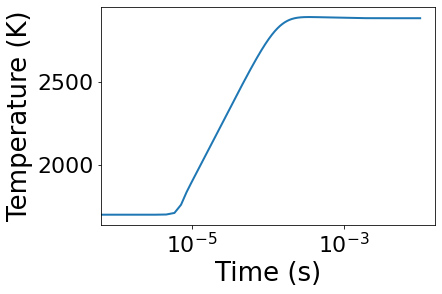

In [9]:
plt.plot(time, temperature)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

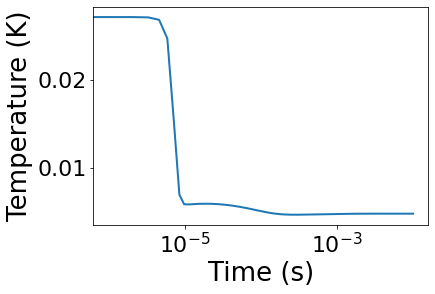

In [10]:
plt.plot(time, Y[:, gas.species_index('H2')])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

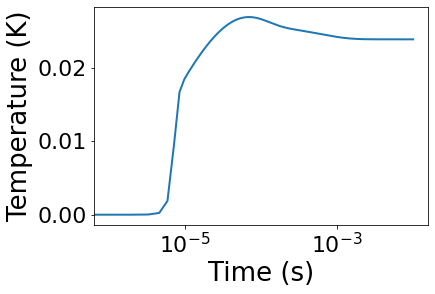

In [11]:
plt.plot(time, Y[:, gas.species_index('OH')])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.xscale('log')
#plt.xlim([1.e-6, 1.e-2])

In [12]:
temperature[-1]

2887.221902662012

In [13]:
Y[-1, gas.species_index('H2')]

0.004770242929211634

In [14]:
EndSpecies = [gas.species_names[i] for i in range(gas.n_species) if (Y[900,i]*100 > .01)]

In [15]:
EndSpecies

['H2', 'H', 'O', 'O2', 'OH', 'H2O', 'NO', 'N2']

In [16]:
Data    = []

Data.append(np.array([[0.7135284280936453, 1.1046153846153843],
        [0.670018750350959, 1000]]))

Data.append(np.array([[0.7136343366778147, 1.1062653288740245],
        [0.3554059037181068, 513.0325584896998]]))
        
Data.append(np.array([[0.7137402452619842, 1.1078985507246375],
        [0.18852212170408722, 290.9163405623883]]))

Data.append(np.array([[0.7153400222965441, 1.1018283166109253],
         [0.13059965479060548, 176.35054720471388]]))

Data.append(np.array([[0.7153901895206244, 1.1095373467112597],
          [0.09671798642975463, 159.55064004448292]]))

In [17]:
a = []
b = []
for i, DataP in enumerate(Data):
    a.append( (DataP[1,1] - DataP[1,0])/(DataP[0,1] - DataP[0,0]) )
    b.append( DataP[1,0] - a[i]*DataP[0,0] )

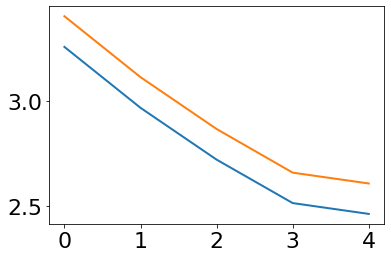

In [18]:
plt.plot(np.log10(np.abs(b)))
plt.plot(np.log10(a))

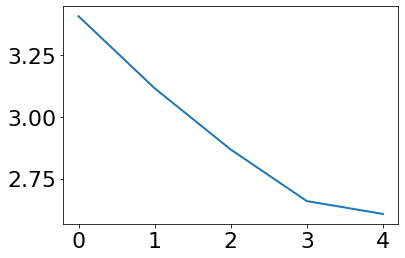

In [19]:
plt.plot(np.log10(a))